In [ ]:
# 使用yolov8模型自动标注数据集（需要后续用labelimg手动标注）

In [1]:
from ultralytics import YOLO
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import shutil
import tqdm

D:\Anaconda\envs\project2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# 加载模型
model_file = "./weights/yolov8x.pt" # 模型文件
model = YOLO(model_file)  # load a pretrained model (recommended for training)
objs_labels = model.names  # get class labels
print(objs_labels)


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [3]:
# iterate all videos
import glob
import os
import tqdm

In [4]:
# iterate all images
images_list = glob.glob("./images/*.jpg")

In [5]:
len(images_list)

108

In [6]:
images_list[:10]

['./images\\D02_20230707102139_1000.jpg',
 './images\\D02_20230707102139_1050.jpg',
 './images\\D02_20230707102139_1100.jpg',
 './images\\D02_20230707102139_1150.jpg',
 './images\\D02_20230707102139_1200.jpg',
 './images\\D02_20230707102139_1250.jpg',
 './images\\D02_20230707102139_1300.jpg',
 './images\\D02_20230707102139_1350.jpg',
 './images\\D02_20230707102139_1400.jpg',
 './images\\D02_20230707102139_1450.jpg']

In [7]:
# 创建indoor_person文件夹
if not os.path.exists("./indoor_person"):
    os.mkdir("./indoor_person")

In [8]:
# 将图片标注为yolo格式，并保存为txt文件
def image_2_yolo():
    # 保存路径前缀
    savePathPrefix = "./indoor_person/"
    # 遍历每张图片
    for img in images_list:
        # 获取图片文件名
        imgId = img.split(os.sep)[-1].split('.')[0]
        # 读取图片
        img_data = cv2.imread(img)
        # 检测
        result = list(model(img_data, stream=True, conf=0.5))[0]  # inference，如果stream=False，返回的是一个列表，如果stream=True，返回的是一个生成器
        boxes = result.boxes  # Boxes object for bbox outputs
        boxes = boxes.cpu().numpy()  # convert to numpy array

        # 转为yolo格式：类别id、x_center y_center width height，归一化到0-1，保留6位小数
        yolo_boxes = []
        # 获取图片宽高
        img_h, img_w, _ = img_data.shape
        # 遍历每个框
        for box in boxes.data:
            l,t,r,b = box[:4].astype(np.int32) # left, top, right, bottom
            conf, id = box[4:] # confidence, class
            # 筛选出person类别
            if id == 0:
                # print(f"l: {l}, t: {t}, r: {r}, b: {b}, conf: {conf}, id: {id}")
                # if id == 0: # person, create yolo format label file
                class_label = int(id)
                x_center = round((l + r) / 2 / img_w, 6)
                y_center = round((t + b) / 2 / img_h, 6)
                width = round((r - l) / img_w, 6)
                height = round((b - t) / img_h, 6)
                
                yolo_boxes.append([class_label, x_center, y_center, width, height])

        # 写入txt文件
        # 生成yolo格式的标注文件，类似：./person_data/labels/train/000001.txt
        yoloLabelFile = savePathPrefix + imgId + '.txt'
        with open(yoloLabelFile, 'w') as f:
            for yolo_box in yolo_boxes:
                f.write(' '.join([str(i) for i in yolo_box]) + '\n')
        

In [9]:
# 启动
image_2_yolo()

D:\Anaconda\envs\project2\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0: 384x640 2 persons, 155.0ms
Speed: 3.0ms preprocess, 155.0ms inference, 336.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 159.0ms
Speed: 3.0ms preprocess, 159.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 146.0ms
Speed: 3.0ms preprocess, 146.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 158.0ms
Speed: 3.0ms preprocess, 158.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 147.0ms
Speed: 2.0ms preprocess, 147.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 241.0ms
Speed: 12.0ms preprocess, 241.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 145.0ms
Speed: 3.0ms preprocess, 145.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 144.0ms
Speed: 2.0ms preprocess, 144.0ms inference, 2.0ms postprocess pe

In [10]:
# 根据yolo格式的标注文件，在图片上绘制
def yoloDraw(img, yoloLabelFile):
    '''
    @param img: 图片
    @param yoloLabelFile: yolo格式的标注文件路径
    '''
    img_copy = img.copy()
    # 生成5类标签对应的颜色
    color_dict = {0: (255, 0, 0), 1: (0, 255, 0), 2: (0, 0, 255), 3: (255, 255, 0), 4: (0, 255, 255)}
    with open(yoloLabelFile, 'r') as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        boxes = [line.split(' ') for line in lines]
        for box in boxes:
            class_label = int(box[0])
            x_center, y_center, width, height = [float(i) for i in box[1:]]
            x1 = int((x_center - width / 2) * img_copy.shape[1])
            y1 = int((y_center - height / 2) * img_copy.shape[0])
            x2 = int((x_center + width / 2) * img_copy.shape[1])
            y2 = int((y_center + height / 2) * img_copy.shape[0])
            cv2.rectangle(img_copy, (x1, y1), (x2, y2), color_dict[class_label], 2)
            cv2.putText(img_copy, str(class_label), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX,1, color_dict[class_label], 2)
    plt.imshow(img_copy[:,:,::-1])
    plt.axis('off')
    plt.show()

(-0.5, 2559.5, 1439.5, -0.5)

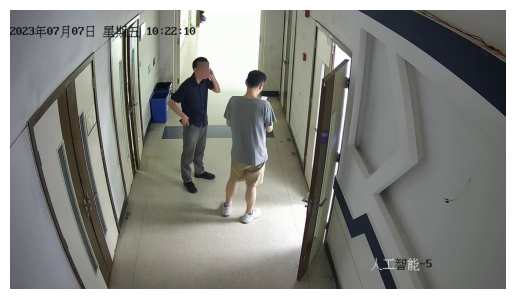

In [11]:
# 读取并显示
imgFile = './images/D02_20230707102139_800.jpg'
img = cv2.imread(imgFile)
plt.imshow(img[:,:,::-1])
plt.axis('off')

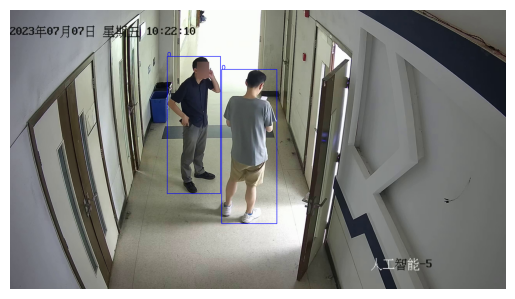

In [12]:
# 测试显示，也可以在LabelImg中查看
yoloDraw(img, "./indoor_person/D02_20230707102139_800.txt")

In [13]:
# 生成classes.txt，每行写入一个类别，0:person
with open('./classes.txt', 'w') as f:
    f.writelines(['0 person\n'])

In [14]:
# 创建多级文件路径：./person_data/images/train, ./person_data/images/val, ./person_data/labels/train, ./person_data/labels/val
if not os.path.exists('./person_data'):
    os.mkdir('./person_data')
if not os.path.exists('./person_data/images'):
    os.mkdir('./person_data/images')
if not os.path.exists('./person_data/images/train'):
    os.mkdir('./person_data/images/train')
if not os.path.exists('./person_data/images/val'):
    os.mkdir('./person_data/images/val')

if not os.path.exists('./person_data/labels'):
    os.mkdir('./person_data/labels')
if not os.path.exists('./person_data/labels/train'):
    os.mkdir('./person_data/labels/train')
if not os.path.exists('./person_data/labels/val'):
    os.mkdir('./person_data/labels/val')


In [15]:
label_list = glob.glob("./indoor_person/*.txt")


In [16]:
label_list

['./indoor_person\\D02_20230707102139_1000.txt',
 './indoor_person\\D02_20230707102139_1050.txt',
 './indoor_person\\D02_20230707102139_1100.txt',
 './indoor_person\\D02_20230707102139_1150.txt',
 './indoor_person\\D02_20230707102139_1200.txt',
 './indoor_person\\D02_20230707102139_1250.txt',
 './indoor_person\\D02_20230707102139_1300.txt',
 './indoor_person\\D02_20230707102139_1350.txt',
 './indoor_person\\D02_20230707102139_1400.txt',
 './indoor_person\\D02_20230707102139_1450.txt',
 './indoor_person\\D02_20230707102139_1500.txt',
 './indoor_person\\D02_20230707102139_1550.txt',
 './indoor_person\\D02_20230707102139_1600.txt',
 './indoor_person\\D02_20230707102139_1650.txt',
 './indoor_person\\D02_20230707102139_1700.txt',
 './indoor_person\\D02_20230707102139_1750.txt',
 './indoor_person\\D02_20230707102139_1800.txt',
 './indoor_person\\D02_20230707102139_1850.txt',
 './indoor_person\\D02_20230707102139_1900.txt',
 './indoor_person\\D02_20230707102139_1950.txt',
 './indoor_person\\D

In [17]:
# 按照8:2划分训练集和验证集
train_num = int(len(images_list) * 0.8)
train_images_list = images_list[:train_num]
val_images_list = images_list[train_num:]

train_label_list = label_list[:train_num]
val_label_list = label_list[train_num:]

In [18]:
# 打印训练集和验证集的数量
print(f"train images num: {len(train_images_list)}, train labels num: {len(train_label_list)}")
print(f"val images num: {len(val_images_list)}, val labels num: {len(val_label_list)}")

train images num: 86, train labels num: 86
val images num: 22, val labels num: 22


In [19]:
# 处理训练集
for img_file_name in tqdm.tqdm(train_images_list, desc='train'):
    # filename
    filename = img_file_name.split(os.sep)[-1]
    # 复制图片到指定路径
    shutil.copy(img_file_name, './person_data/images/train/' + filename)
    #复制标注文件到指定路径
    label_file_name = img_file_name.split(os.sep)[-1].split('.')[0] + '.txt'
    shutil.copy('./indoor_person/' + label_file_name, './person_data/labels/train/' + label_file_name)

# 处理验证集
for img_file_name in tqdm.tqdm(val_images_list, desc='val'):
    # filename
    filename = img_file_name.split(os.sep)[-1]
    # 复制图片到指定路径
    shutil.copy(img_file_name, './person_data/images/val/' + filename)
    #复制标注文件到指定路径
    label_file_name = img_file_name.split(os.sep)[-1].split('.')[0] + '.txt'
    shutil.copy('./indoor_person/' + label_file_name, './person_data/labels/val/' + label_file_name)

val: 100%|█████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 23.51it/s]
